In [5]:
# Importing of important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Finding location of file
os.getcwd()
os.chdir('/Users/jmunizbecerra/Desktop')

In [7]:
# Loading in insurance data and creating dataframe
df = pd.read_csv('insurance.csv')

In [8]:
# Analyzing size of dataframe
df.shape

(1338, 7)

In [9]:
# Checking for any missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Getting a glimpse at data's columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
# Importing of labelencoder to convert categorical data into numerical
# data for analysis
from sklearn.preprocessing import LabelEncoder

In [12]:
# Creation of LabelEncoder objects for categorical data
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

In [13]:
# Creation of a new dataframe to conserve old dataframe
new_df = df

In [14]:
# Addition of transformed categorical data into dataframe
new_df['sex_n'] = le_sex.fit_transform(new_df['sex'])
new_df['smoker_n'] = le_smoker.fit_transform(new_df['smoker'])
new_df['region_n'] = le_region.fit_transform(new_df['region'])

In [15]:
new_df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [16]:
# Smoking: Yes = 1, No = 0
# Sex: Male = 1, Female = 0
# Region: Southwest = 3, Southeast = 2, Northwest = 1, Northeast = 0

In [17]:
# Removal of categorical data columns
df_final = new_df.drop(columns=['sex', 'smoker', 'region'])

# Understanding What Our Data Consists Of 

In [18]:
# Breakdown of sex into groups (males, females)
gender = df.groupby('sex')

In [19]:
# Getting averages for each group
gender.mean()

,age,bmi,children,charges,sex_n,smoker_n,region_n
sex,,,,,,,
female,39.503021,30.377749,1.074018,12569.578844,0.0,0.173716,1.510574
male,38.917160,30.943129,1.115385,13956.751178,1.0,0.235207,1.520710


In [20]:
# Number of males
len(df.loc[df['sex'] == 'male'])

676

In [21]:
# Number of females
len(df.loc[df['sex'] == 'female'])

662

In [22]:
# Grouping data by region
regions = df.groupby('region')

In [23]:
# Obtaining means based off regions
regions.mean()

,age,bmi,children,charges,sex_n,smoker_n,region_n
region,,,,,,,
northeast,39.268519,29.173503,1.046296,13406.384516,0.503086,0.206790,0.0
northwest,39.196923,29.199785,1.147692,12417.575374,0.495385,0.178462,1.0
southeast,38.939560,33.355989,1.049451,14735.411438,0.519231,0.250000,2.0
southwest,39.455385,30.596615,1.141538,12346.937377,0.501538,0.178462,3.0


In [24]:
# Obtaining max values based off regions
regions.max()

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n,region_n
region,,,,,,,,,
northeast,64,male,48.07,5,yes,58571.07448,1,1,0
northwest,64,male,42.94,5,yes,60021.39897,1,1,1
southeast,64,male,53.13,5,yes,63770.42801,1,1,2
southwest,64,male,47.60,5,yes,52590.82939,1,1,3


In [25]:
# Obtaining min values based off regions
regions.min()

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n,region_n
region,,,,,,,,,
northeast,18,female,15.960,0,no,1694.7964,0,0,0
northwest,19,female,17.385,0,no,1621.3402,0,0,1
southeast,18,female,19.800,0,no,1121.8739,0,0,2
southwest,19,female,17.400,0,no,1241.5650,0,0,3


In [26]:
# Number of clients from NORTHEAST region
len(df.loc[df['region'] == 'northeast'])

324

In [27]:
# Number of clients from NORTHWEST region
len(df.loc[df['region'] == 'northwest'])

325

In [28]:
# Number of clients from SOUTHEAST region
len(df.loc[df['region'] == 'southeast'])

364

In [29]:
# Number of clients from SOUTHWEST region
len(df.loc[df['region'] == 'southwest'])

325

# Visualization of Data

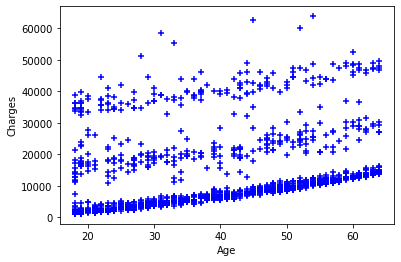

In [46]:
# Plotting Age against Charges
plt.xlabel('Age')
plt.ylabel('Charges')
plt.scatter(x.age, x.charges, color='blue', marker='+')

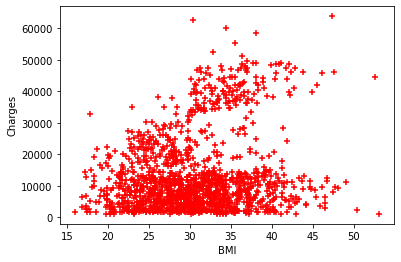

In [48]:
# Plotting BMI against Charges
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.scatter(x.bmi, x.charges, color='red', marker='+')

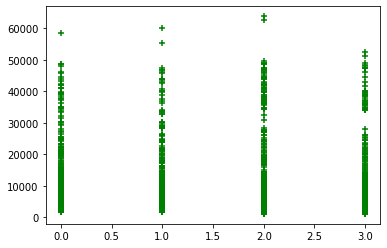

In [49]:
# Plotting Region against Charges
plt.scatter(x.region_n, x.charges, color='green', marker='+')

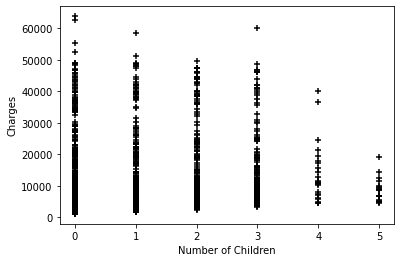

In [52]:
# Plotting Children against Charges
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.scatter(x.children, x.charges, color='black', marker='+')

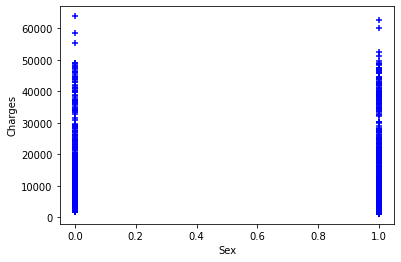

In [54]:
# Plotting Gender against Charges
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.scatter(x.sex_n, x.charges, color='blue', marker='+')

# Multi-Variate Regression Analysis

In [30]:
x = df_final
y = df.charges

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [32]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x[['age', 'bmi', 'region_n', 'smoker_n', 'children', 'sex_n']], x.charges)

LinearRegression()

In [33]:
model.predict([[35, 27, 3, 0, 1, 1]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5456.36263359])

In [34]:
x_test

,age,bmi,children,charges,sex_n,smoker_n,region_n
338,50,32.300,1,41919.09700,1,1,0
620,30,31.400,1,3659.34600,1,0,3
965,35,27.100,1,4746.34400,1,0,3
128,32,17.765,2,32734.18630,0,1,1
329,52,36.700,0,9144.56500,1,0,3
...,...,...,...,...,...,...,...
580,59,25.460,1,12913.99240,1,0,0
786,60,36.955,0,12741.16745,1,0,0
321,26,29.640,4,24671.66334,0,0,0
903,49,36.850,0,8125.78450,1,0,2


In [35]:
model.score(x[['age', 'bmi', 'region_n', 'smoker_n', 'children', 'sex_n']], x.charges)

0.7507372027994939